# Parameters

In this notebook we want to analyse different system parameters that lead to a two dimensional intensity distribution. Present measurements include:

1. PI Control
2. RF Amplifier

In [1]:
import numpy as np
import pandas as pd

import read
import util

from matplotlib import pyplot as plt
from matplotlib import dates as mdates

## PI Control

The PI control is described in the experimental section setup. It is used to counteract laser fluctuations on a large time scale.

For measurement we replaced the two dimensional AOD with a second photodiode and measured the intensity every minute.

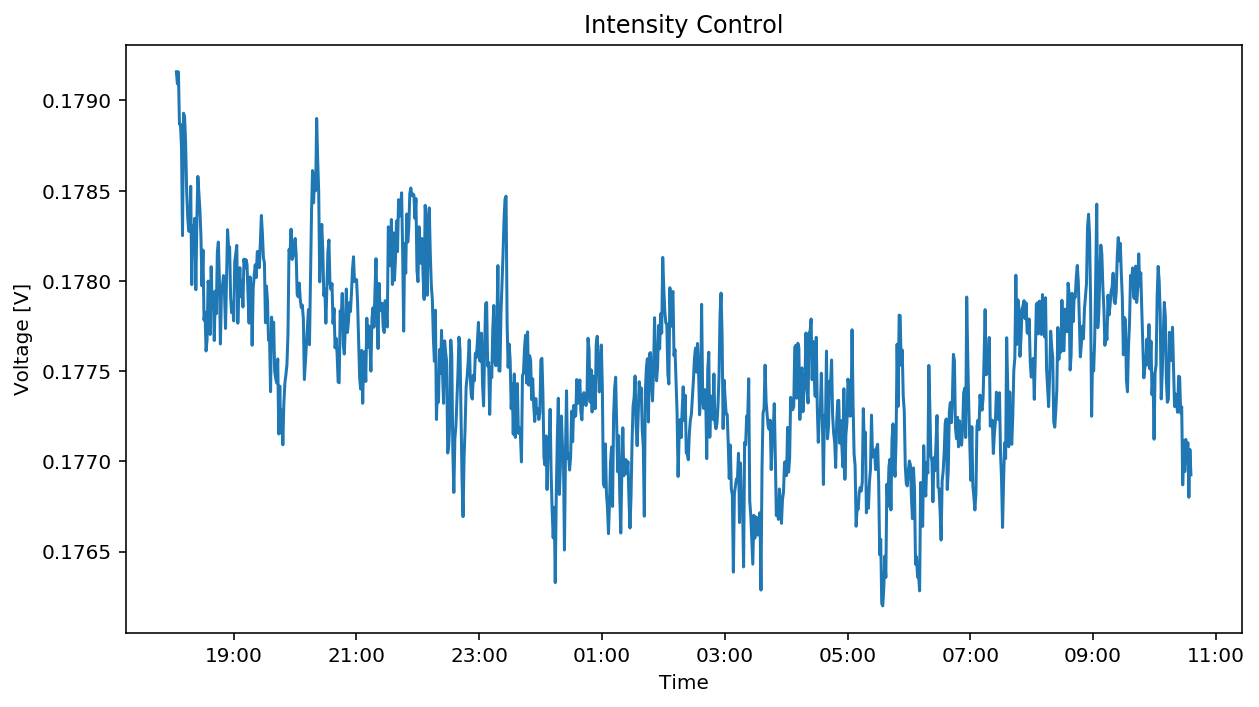

In [2]:
picontrol = read.timeseries('../datasets/picontrol0')
picontrol['datetime'] = pd.to_datetime(picontrol['datetime'], format='%Y-%m-%d_%H%M%S')

fig = plt.figure(figsize=(10, 6))
fig.autofmt_xdate()

axis = fig.add_subplot(111)
axis.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axis.set_title('Intensity Control')
axis.set_xlabel('Time')
axis.set_ylabel('Voltage [V]')
axis.plot(picontrol['datetime'].astype('O'), picontrol['voltage'])

plt.show()

The timeseries data of the intensity control looks reminds of a random walk process. However, to assess the magnitude of the observed noise of the pi control we have to compare the photodiode voltages to other measurements.

## RF Amplifier

The synthesized RF signal is amplified before dumped into the AODs. To estimate the impact of the amplifier on the intensity we used the same measurement protocol used to create the intensity distributions but connected the oscilloscope directly to the amplifier output using the appropriate attentuators in between.

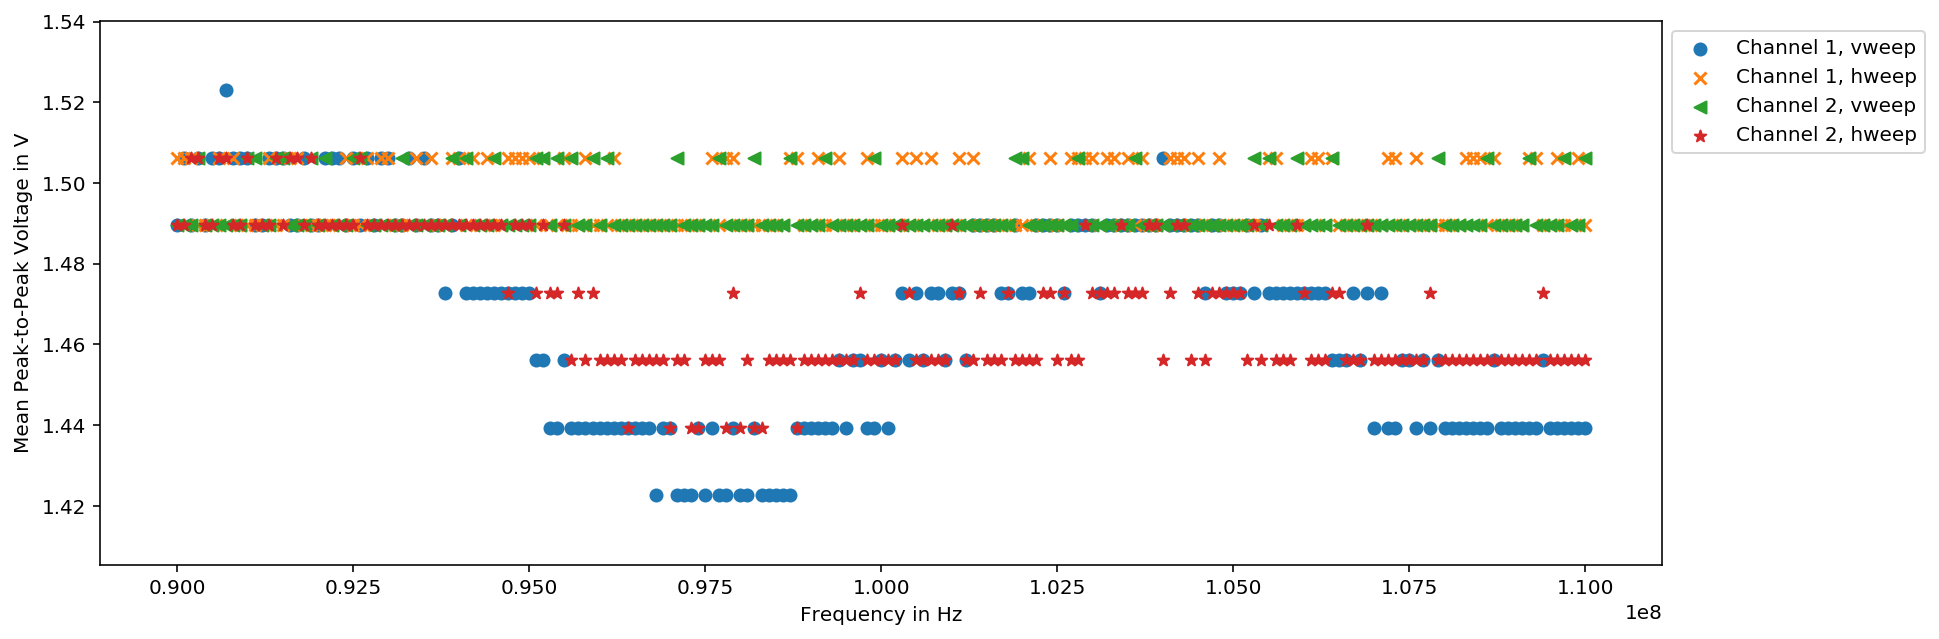

In [2]:
rfamplifier = read.voltages('../datasets/rfamplifier0')
start, stop = util.argoffset(rfamplifier['time'].iloc[0], -1, +1)
rfamplifier['mean_voltage'] = rfamplifier['voltage'].map(lambda U: util.peaktopeak(U[start:stop]))

ch1v = rfamplifier[(rfamplifier['channel'] == 1) & (rfamplifier['mode'] == 'vertical')]
ch1h = rfamplifier[(rfamplifier['channel'] == 1) & (rfamplifier['mode'] == 'horizontal')]

ch2v = rfamplifier[(rfamplifier['channel'] == 2) & (rfamplifier['mode'] == 'vertical')]
ch2h = rfamplifier[(rfamplifier['channel'] == 2) & (rfamplifier['mode'] == 'horizontal')]

plt.figure(figsize=(14, 5))
plt.xlabel('Frequency in Hz')
plt.ylabel('Mean Peak-to-Peak Voltage in V')
plt.scatter(ch1v['frequency'], ch1v['mean_voltage'], label='Channel 1, vweep')
plt.scatter(ch1h['frequency'], ch1h['mean_voltage'], label='Channel 1, hweep', marker='x')
plt.scatter(ch2v['frequency'], ch2v['mean_voltage'], label='Channel 2, vweep', marker='<')
plt.scatter(ch2h['frequency'], ch2h['mean_voltage'], label='Channel 2, hweep', marker='*')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

The green and yellow markers are the peak-to-peak voltages at constant frequencies for the first and second amplifier. We see that they take on two discrete values and differ by a constant.

The blua and red markers are obtained from the mean peak-to-peak voltages when the first and second amplifier output a chirped signal. We observe that in this case there is a frequency dependency involved, probably to internal impedance effects where the amplifier has different resonance behaviour.

In [20]:
t1a, U1a = read.h5dataset('../datasets/broken/3nodwelllowhorinh1.h5', 1)
t1b, U1b = read.h5dataset('../datasets/broken/3nodwellhighorinh1.h5', 1)
t2a, U2a = read.h5dataset('../datasets/broken/2nodwelllowvertinh1.h5', 1)
t2b, U2b = read.h5dataset('../datasets/broken/2nodwellhigvertinh1.h5', 1)

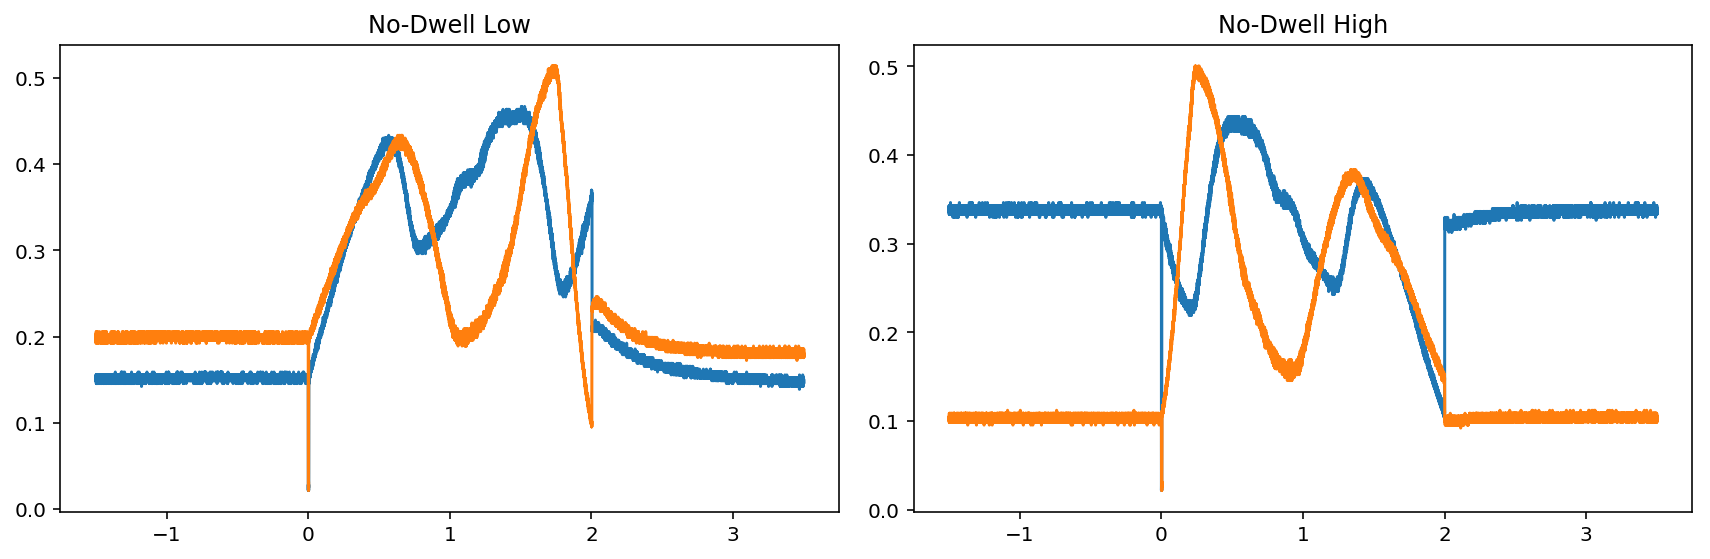

In [22]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.title('No-Dwell Low')
plt.plot(t1a, U1a)
plt.plot(t2a, U2a)

plt.subplot(122)
plt.title('No-Dwell High')
plt.plot(t1b, U1b)
plt.plot(t2b, U2b)

plt.tight_layout()
plt.show()

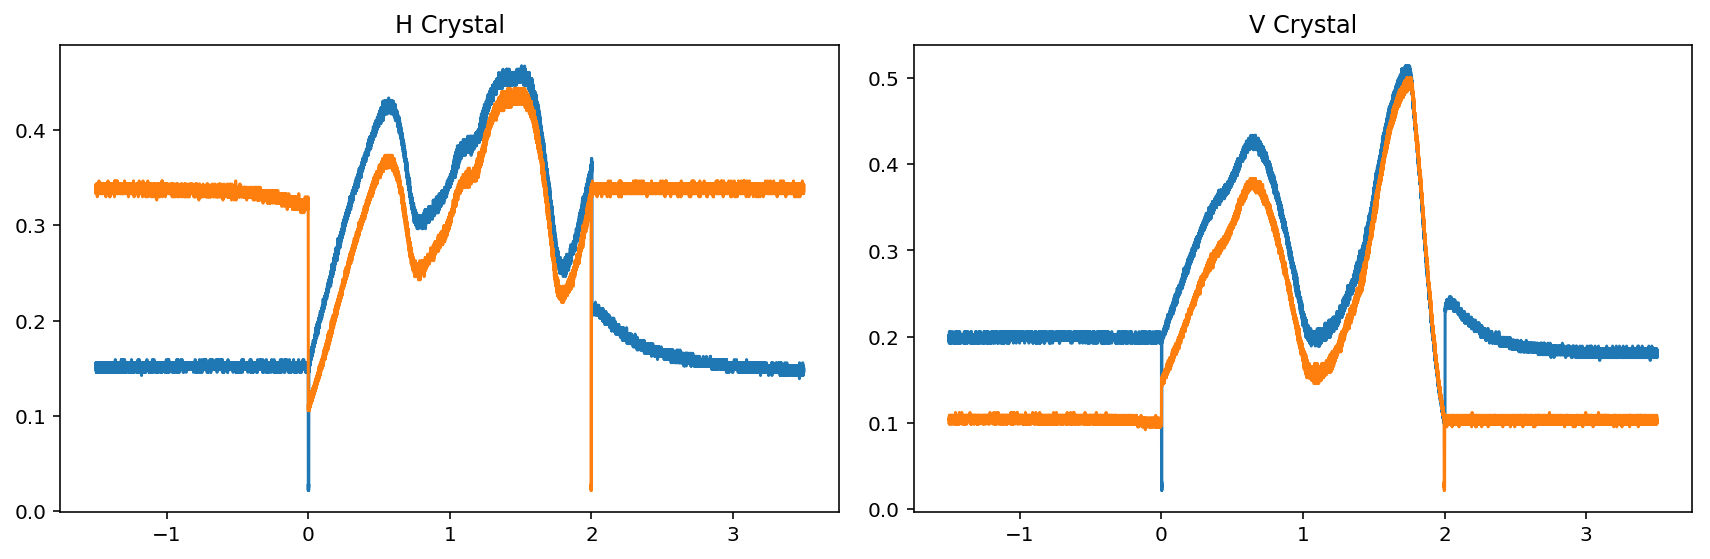

In [23]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.title('H Crystal')
plt.plot(t1a, U1a)
plt.plot(t1b, U1b[::-1])

plt.subplot(122)
plt.title('V Crystal')
plt.plot(t2a, U2a)
plt.plot(t2b, U2b[::-1])

plt.tight_layout()
plt.show()

In [25]:
t3, U3 = read.h5dataset('../datasets/broken/4nodwelllowhorinv1.h5', 1)
t4, U4 = read.h5dataset('../datasets/broken/5nodwelllowverinv1.h5', 1)

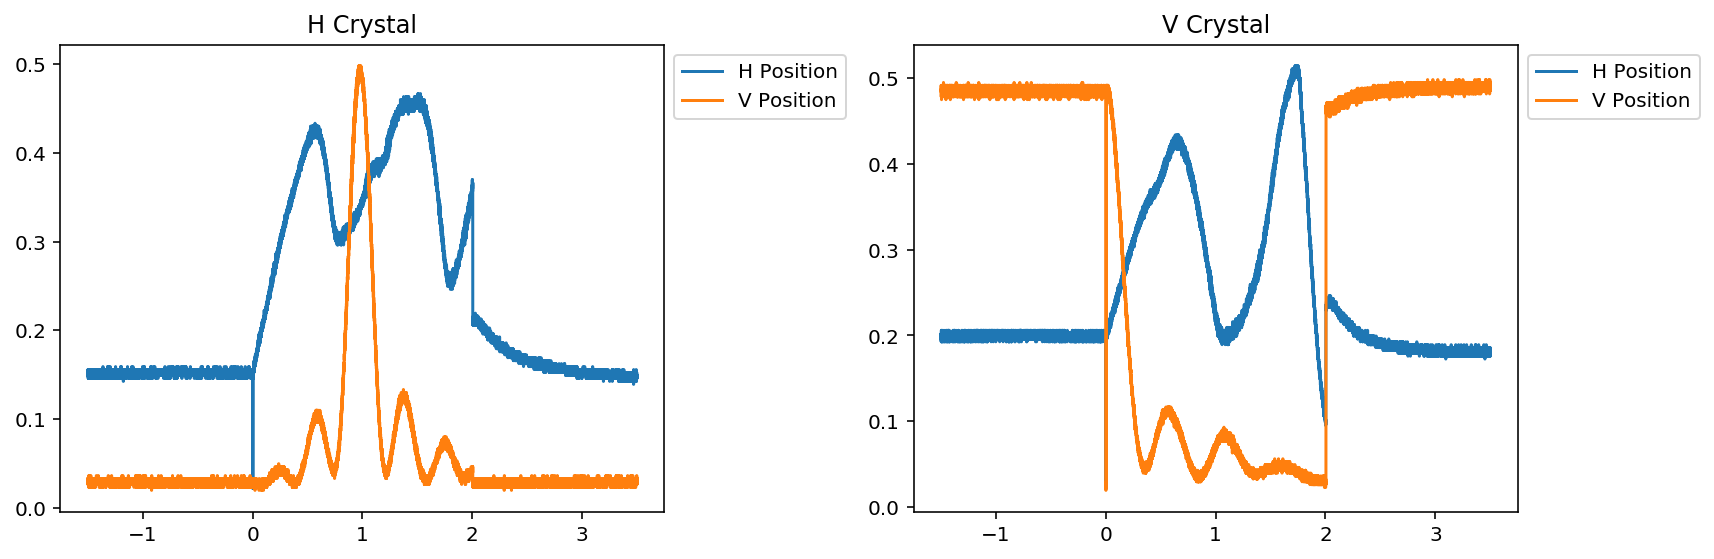

In [26]:
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.title('H Crystal')
plt.plot(t1a, U1a, label='H Position')
plt.plot(t3, U3, label='V Position')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.subplot(122)
plt.title('V Crystal')
plt.plot(t2a, U2a, label='H Position')
plt.plot(t4, U4, label='V Position')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.tight_layout()
plt.show()

In [27]:
t5, U5 = read.h5dataset('../datasets/broken/6hsweepnodwelllow1.h5', 1)
t6, U6 = read.h5dataset('../datasets/broken/7vsweepnodwelllow1.h5', 1)

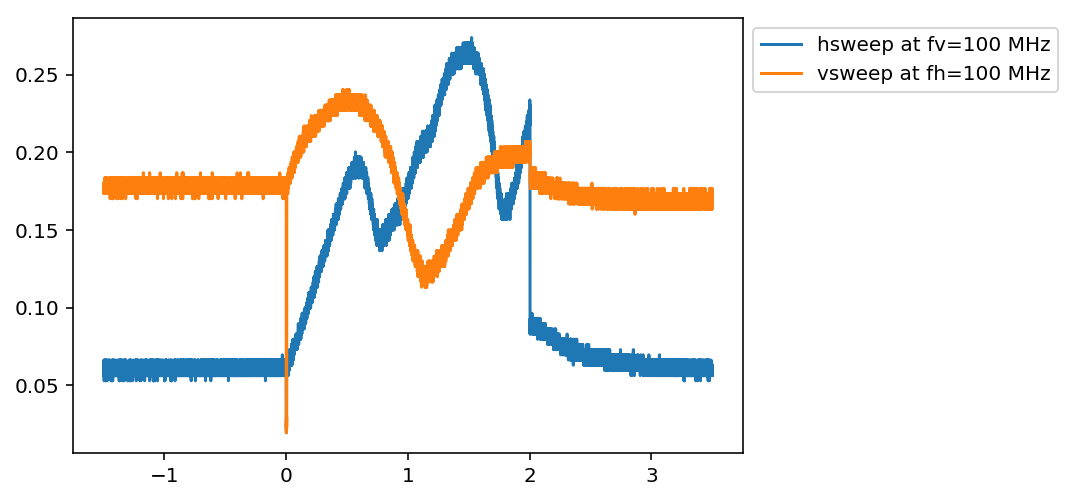

In [29]:
plt.plot(t5, U5, label='hsweep at fv=100 MHz')
plt.plot(t6, U6, label='vsweep at fh=100 MHz')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

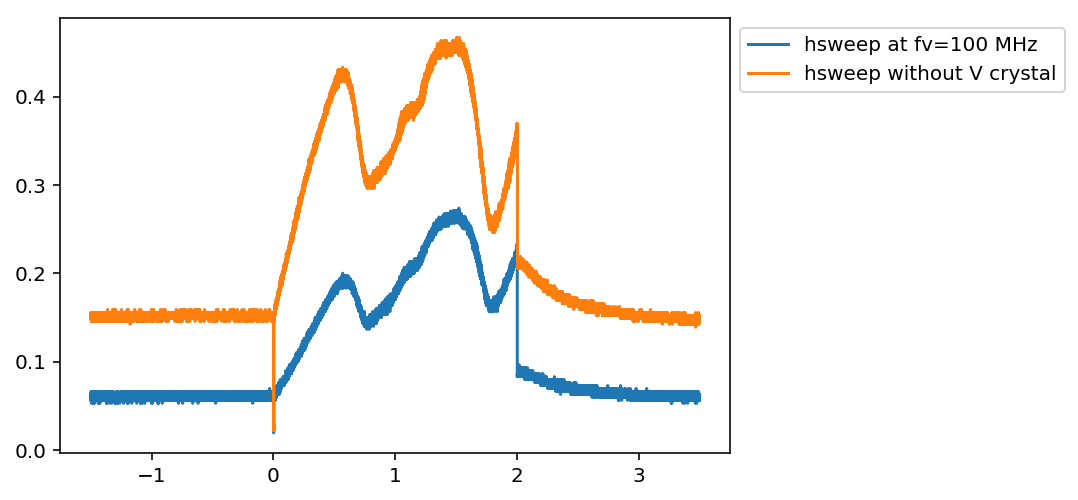

In [32]:
plt.plot(t5, U5, label='hsweep at fv=100 MHz')
plt.plot(t1a, U1a, label='hsweep without V crystal')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

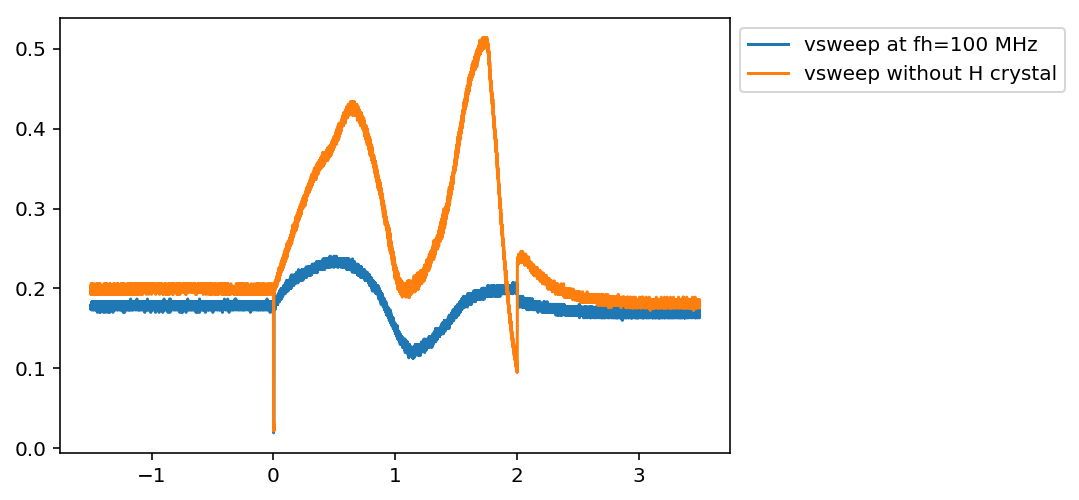

In [33]:
plt.plot(t6, U6, label='vsweep at fh=100 MHz')
plt.plot(t2a, U2a, label='vsweep without H crystal')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

## Transducer

With transducer we mean the piezoelectric element and the circuit mediating the amplified RF signal to the piezoelectric element.

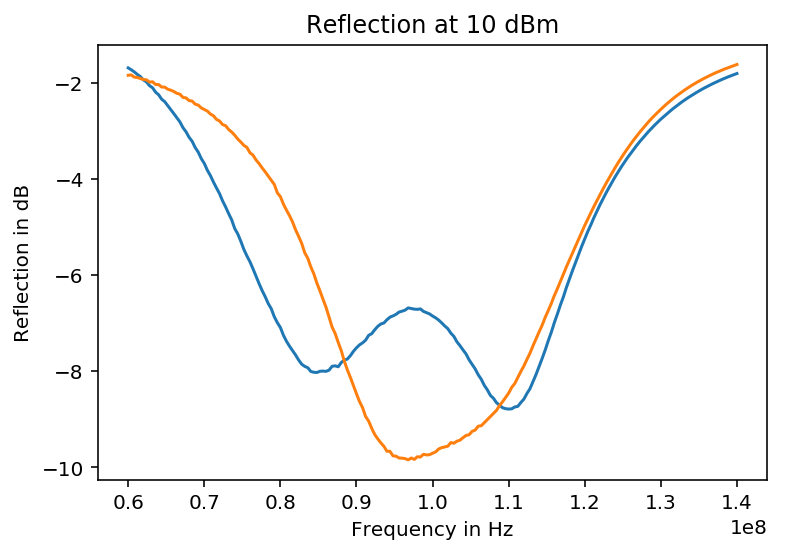

In [5]:
href = read.csv('../datasets/transducer0/href.csv')
vref = read.csv('../datasets/transducer0/vref.csv')

plt.title('Reflection at 10 dBm')
plt.xlabel('Frequency in Hz')
plt.ylabel('Reflection in dB')
plt.plot(href['frequency'], href['amplification'], label='H Crystal')
plt.plot(vref['frequency'], vref['amplification'], label='H Crystal')
plt.show()

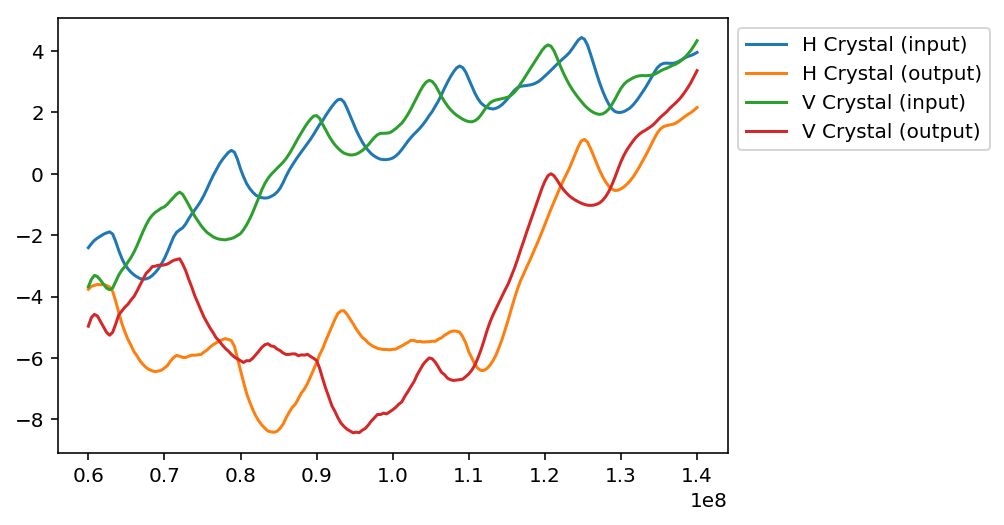

In [7]:
hin = read.csv('../datasets/transducer0/0db/hin.csv')
hout = read.csv('../datasets/transducer0/0db/hout.csv')
vin = read.csv('../datasets/transducer0/0db/vin.csv')
vout = read.csv('../datasets/transducer0/0db/vout.csv')

plt.plot(hin['frequency'], hin['amplification'], label='H Crystal (input)')
plt.plot(hout['frequency'], hout['amplification'], label='H Crystal (output)')
plt.plot(vin['frequency'], vin['amplification'], label='V Crystal (input)')
plt.plot(vout['frequency'], vout['amplification'], label='V Crystal (output)')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()